In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset and display the first few elements 


In [2]:
injuries = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'dataser-injuries-football - dataset_injury_football.csv'))
injuries.head()

p_id2  start_year  season_days_injured  total_days_injured  \
0   aaronconnolly        2019                   13               161.0   
1   aaronconnolly        2020                   71               161.0   
2  aaroncresswell        2016                   95               226.0   
3  aaroncresswell        2018                   87               226.0   
4  aaroncresswell        2019                   35               226.0   

   season_minutes_played  season_games_played  season_matches_in_squad  \
0                  1.312                   24                       28   
1                836.000                   17                       28   
2                  2.247                   26                       27   
3                  1.680                   20                       27   
4                  2.870                   31                       31   

   total_minutes_played  total_games_played         dob  ...  \
0                 2.148                  41  28/01/2000  ...   
1                 2.148                  41  28/01/2000  ...   
2                13.368                 149  15/12/1989  ...   
3                13.368                 149  15/12/1989  ...   
4                13.368                 149  15/12/1989  ...   

  cumulative_games_played minutes_per_game_prev_seasons  \
0                     NaN                           NaN   
1                    24.0                         54,67   
2                     NaN                           NaN   
3                    26.0                         86,42   
4                    46.0                         85,37   

  avg_days_injured_prev_seasons avg_games_per_season_prev_seasons  \
0                           NaN                               NaN   
1                         13,00                             24,00   
2                           NaN                               NaN   
3                         95,00                             26,00   
4                         91,00                             23,00   

           bmi work_rate_numeric position_numeric  \
0  24,61362749               2,5              2.0   
1  24,61362749               2,5              2.0   
2  22,39607880               3,5              1.0   
3  22,39607880               3,5              1.0   
4  22,39607880               3,5              1.0   

  significant_injury_prev_season  cumulative_days_injured  \
0                            NaN                      NaN   
1                            0.0                    161.0   
2                            NaN                      NaN   
3                            0.0                    226.0   
4                            0.0                    452.0   

   season_days_injured_prev_season  
0                              NaN  
1                             13.0  
2                              NaN  
3                             95.0  
4                             87.0  

[5 rows x 30 columns]

**Display the info of the dataset**

In [3]:
injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   p_id2                              1301 non-null   object 
 1   start_year                         1301 non-null   int64  
 2   season_days_injured                1301 non-null   int64  
 3   total_days_injured                 1301 non-null   float64
 4   season_minutes_played              1301 non-null   float64
 5   season_games_played                1301 non-null   int64  
 6   season_matches_in_squad            1301 non-null   int64  
 7   total_minutes_played               1301 non-null   float64
 8   total_games_played                 1301 non-null   int64  
 9   dob                                1301 non-null   object 
 10  height_cm                          1301 non-null   object 
 11  weight_kg                          1301 non-null   objec

Clean the data by removing any null values 

Replace some of the column names 

Replace the "," in some columns with "."

In [4]:
injuries.dropna(inplace=True)
injuries = injuries.rename(columns={injuries.columns[0]: "Player Name",})
injuries = injuries.replace(',', '.', regex=True)
pd.set_option('display.max_columns', None)
injuries

Player Name  start_year  season_days_injured  total_days_injured  \
1         aaronconnolly        2020                   71               161.0   
3        aaroncresswell        2018                   87               226.0   
4        aaroncresswell        2019                   35               226.0   
5        aaroncresswell        2020                    9               226.0   
7           aaronlennon        2018                  166               199.0   
...                 ...         ...                  ...                 ...   
1291          yerrymina        2019                   54               427.0   
1292          yerrymina        2020                   83               427.0   
1294        yohancabaye        2017                   48                64.0   
1296      yoshinorimuto        2019                   46               210.0   
1300  zlatanibrahimovic        2017                   84               579.0   

      season_minutes_played  season_games_played  season_matches_in_squad  \
1                   836.000                   17                       28   
3                     1.680                   20                       27   
4                     2.870                   31                       31   
5                     3.342                   36                       36   
7                     1.279                   16                       16   
...                     ...                  ...                      ...   
1291                  2.421                   29                       31   
1292                  2.044                   24                       30   
1294                  2.467                   31                       33   
1296                288.000                    8                       17   
1300                122.000                    5                        8   

      total_minutes_played  total_games_played         dob height_cm  \
1                    2.148                  41  28/01/2000    175.33   
3                   13.368                 149  15/12/1989    171.67   
4                   13.368                 149  15/12/1989    171.67   
5                   13.368                 149  15/12/1989    171.67   
7                    4.371                  72  16/04/1987    165.00   
...                    ...                 ...         ...       ...   
1291                 5.412                  66  23/09/1994    194.50   
1292                 5.412                  66  23/09/1994    194.50   
1294                 4.694                  63  14/01/1986    174.33   
1296               915.000                  25  15/07/1992    178.50   
1300                 2.699                  33   3/10/1981    195.00   

     weight_kg          nationality      work_rate   pace physic fifa_rating  \
1        75.67  Republic of Ireland     Medium/Low  72.33  58.00       63.00   
3        66.00              England    High/Medium  74.33  67.00       75.33   
4        66.00              England    High/Medium  74.33  67.00       75.33   
5        66.00              England    High/Medium  74.33  67.00       75.33   
7        63.00              England      High/High  81.80  59.20       75.80   
...        ...                  ...            ...    ...    ...         ...   
1291     89.25             Colombia  Medium/Medium  49.75  79.25       75.50   
1292     89.25             Colombia  Medium/Medium  49.75  79.25       75.50   
1294     71.00               France  Medium/Medium  65.67  72.67       79.67   
1296     72.00                Japan      High/High  77.50  58.50       74.33   
1300     95.00               Sweden     Medium/Low  62.83  81.17       86.67   

        position  age  cumulative_minutes_played  cumulative_games_played  \
1        Forward   20                      1.312                     24.0   
3       Defender   29                      2.247                     26.0   
4       Defender   30                      3.927                     

**Convert the data types which are stings but contain numbers to floats if possible**

In [5]:
cols = [
    "height_cm",
    "weight_kg",
    "pace",
    "physic",
    "fifa_rating",
    "minutes_per_game_prev_seasons",
    "cumulative_games_played",
    "minutes_per_game_prev_seasons",
    "avg_days_injured_prev_seasons",
    "bmi",
    "work_rate_numeric",
]
for c in cols:
    injuries[c] = injuries[c].astype(float)
injuries.info()
injuries.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1 to 1300
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player Name                        643 non-null    object 
 1   start_year                         643 non-null    int64  
 2   season_days_injured                643 non-null    int64  
 3   total_days_injured                 643 non-null    float64
 4   season_minutes_played              643 non-null    float64
 5   season_games_played                643 non-null    int64  
 6   season_matches_in_squad            643 non-null    int64  
 7   total_minutes_played               643 non-null    float64
 8   total_games_played                 643 non-null    int64  
 9   dob                                643 non-null    object 
 10  height_cm                          643 non-null    float64
 11  weight_kg                          643 non-null    float6

Player Name  start_year  season_days_injured  total_days_injured  \
1   aaronconnolly        2020                   71               161.0   
3  aaroncresswell        2018                   87               226.0   
4  aaroncresswell        2019                   35               226.0   
5  aaroncresswell        2020                    9               226.0   
7     aaronlennon        2018                  166               199.0   

   season_minutes_played  season_games_played  season_matches_in_squad  \
1                836.000                   17                       28   
3                  1.680                   20                       27   
4                  2.870                   31                       31   
5                  3.342                   36                       36   
7                  1.279                   16                       16   

   total_minutes_played  total_games_played         dob  height_cm  weight_kg  \
1                 2.148                  41  28/01/2000     175.33      75.67   
3                13.368                 149  15/12/1989     171.67      66.00   
4                13.368                 149  15/12/1989     171.67      66.00   
5                13.368                 149  15/12/1989     171.67      66.00   
7                 4.371                  72  16/04/1987     165.00      63.00   

           nationality    work_rate   pace  physic  fifa_rating    position  \
1  Republic of Ireland   Medium/Low  72.33    58.0        63.00     Forward   
3              England  High/Medium  74.33    67.0        75.33    Defender   
4              England  High/Medium  74.33    67.0        75.33    Defender   
5              England  High/Medium  74.33    67.0        75.33    Defender   
7              England    High/High  81.80    59.2        75.80  Midfielder   

   age  cumulative_minutes_played  cumulative_games_played  \
1   20                      1.312                     24.0   
3   29                      2.247                     26.0   
4   30                      3.927                     46.0   
5   31                      6.797                     77.0   
7   31                      1.996                     29.0   

   minutes_per_game_prev_seasons  avg_days_injured_prev_seasons  \
1                          54.67                          13.00   
3                          86.42                          95.00   
4                          85.37                          91.00   
5                          88.27                          72.33   
7                          68.83                          33.00   

  avg_games_per_season_prev_seasons        bmi  work_rate_numeric  \
1                             24.00  24.613627                2.5   
3                             26.00  22.396079                3.5   
4                             23.00  22.396079                3.5   
5                             25.67  22.396079                3.5   
7                             29.00  23.140496                4.0   

   position_numeric  significant_injury_prev_season  cumulative_days_injured  \
1               2.0                             0.0                    161.0   
3               1.0                             0.0                    226.0   
4               1.0                             0.0                    452.0   
5               1.0                             0.0                    678.0   
7               3.0                             0.0                    199.0   

   season_days_injured_prev_season  
1                             13.0  
3                             95.0  
4                             87.0  
5                             35.0  
7                             33.0

**Do some preliminary exploration of the data**

Key things I want to see if they have an effect:
- Exposure/Workload may correlate with a players injury risk 
- Does phyical profile affect injuries
- Previous injury history and how this affects future injuries

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


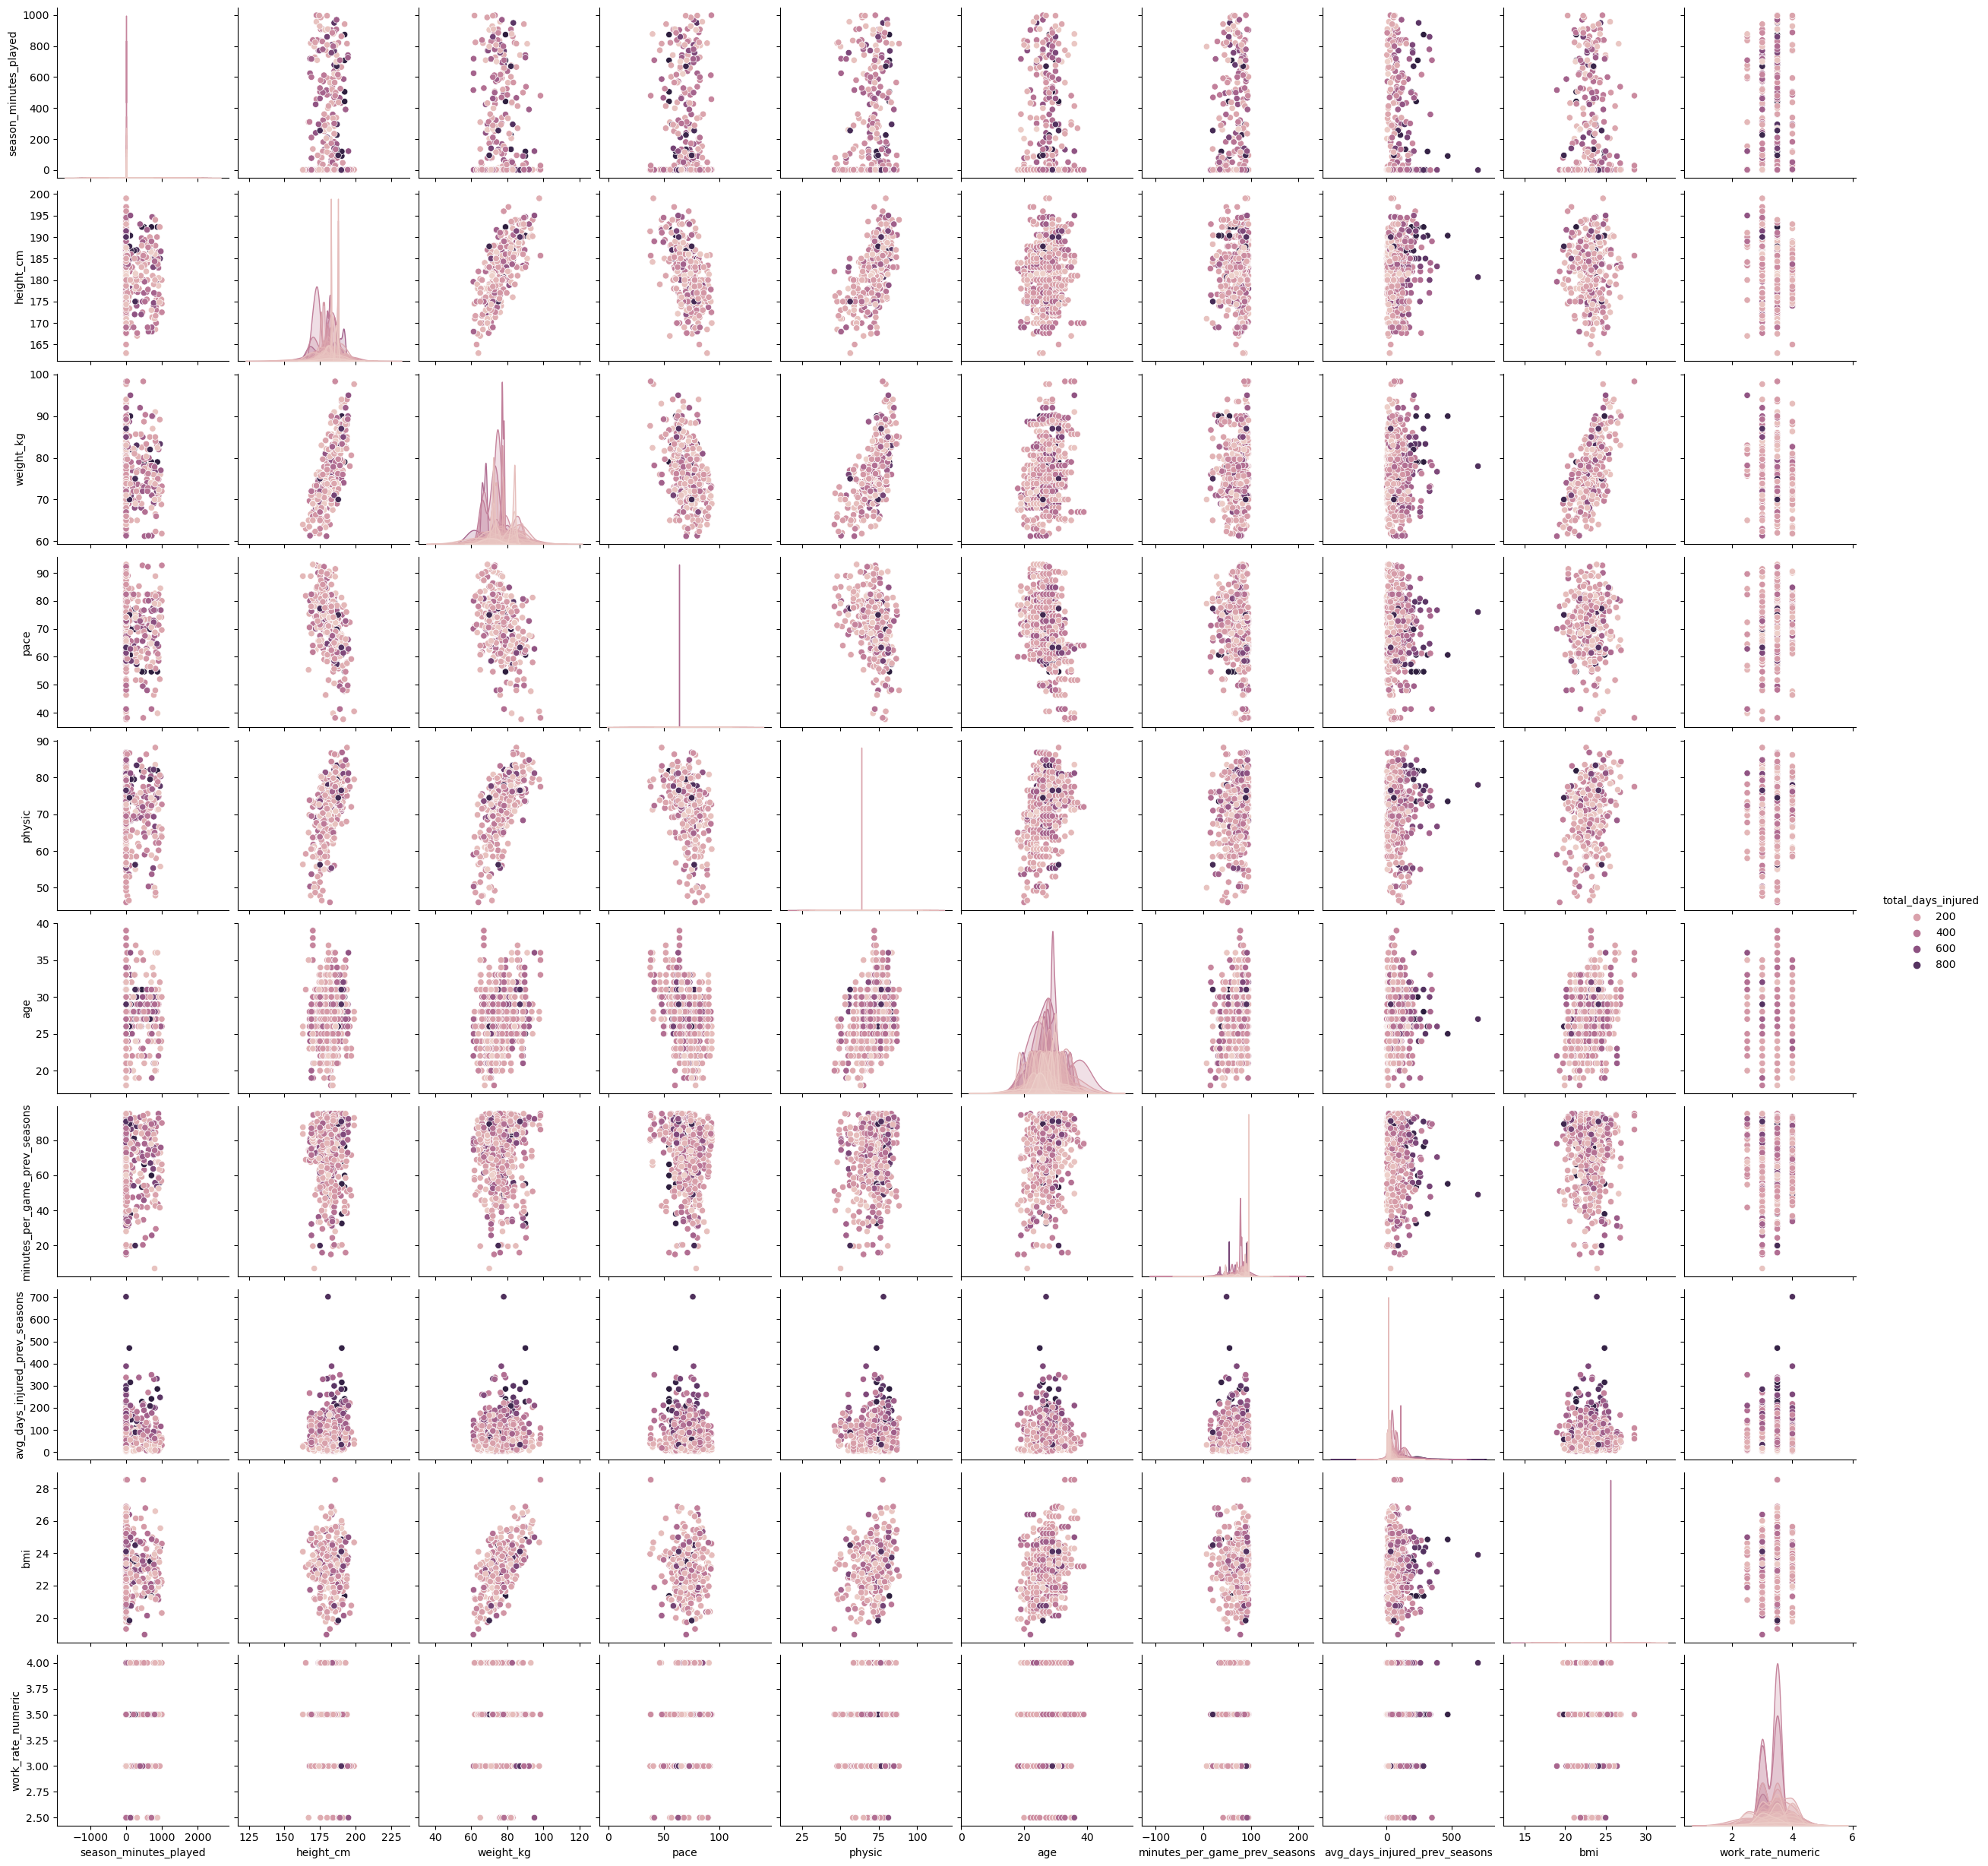

In [6]:
sns.pairplot(data = injuries[["total_days_injured",
                              "season_minutes_played", 
                              "height_cm",
                              "weight_kg",
                              "pace",
                              "physic",
                              "age",
                              "minutes_per_game_prev_seasons", 
                              "avg_days_injured_prev_seasons", 
                              "avg_games_per_season_prev_seasons", 
                              "bmi", 
                              "work_rate_numeric"]],
            hue = "total_days_injured")

**There are too many variables to look at so I am going to split it up into categories related to the key things I think will have effects**

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


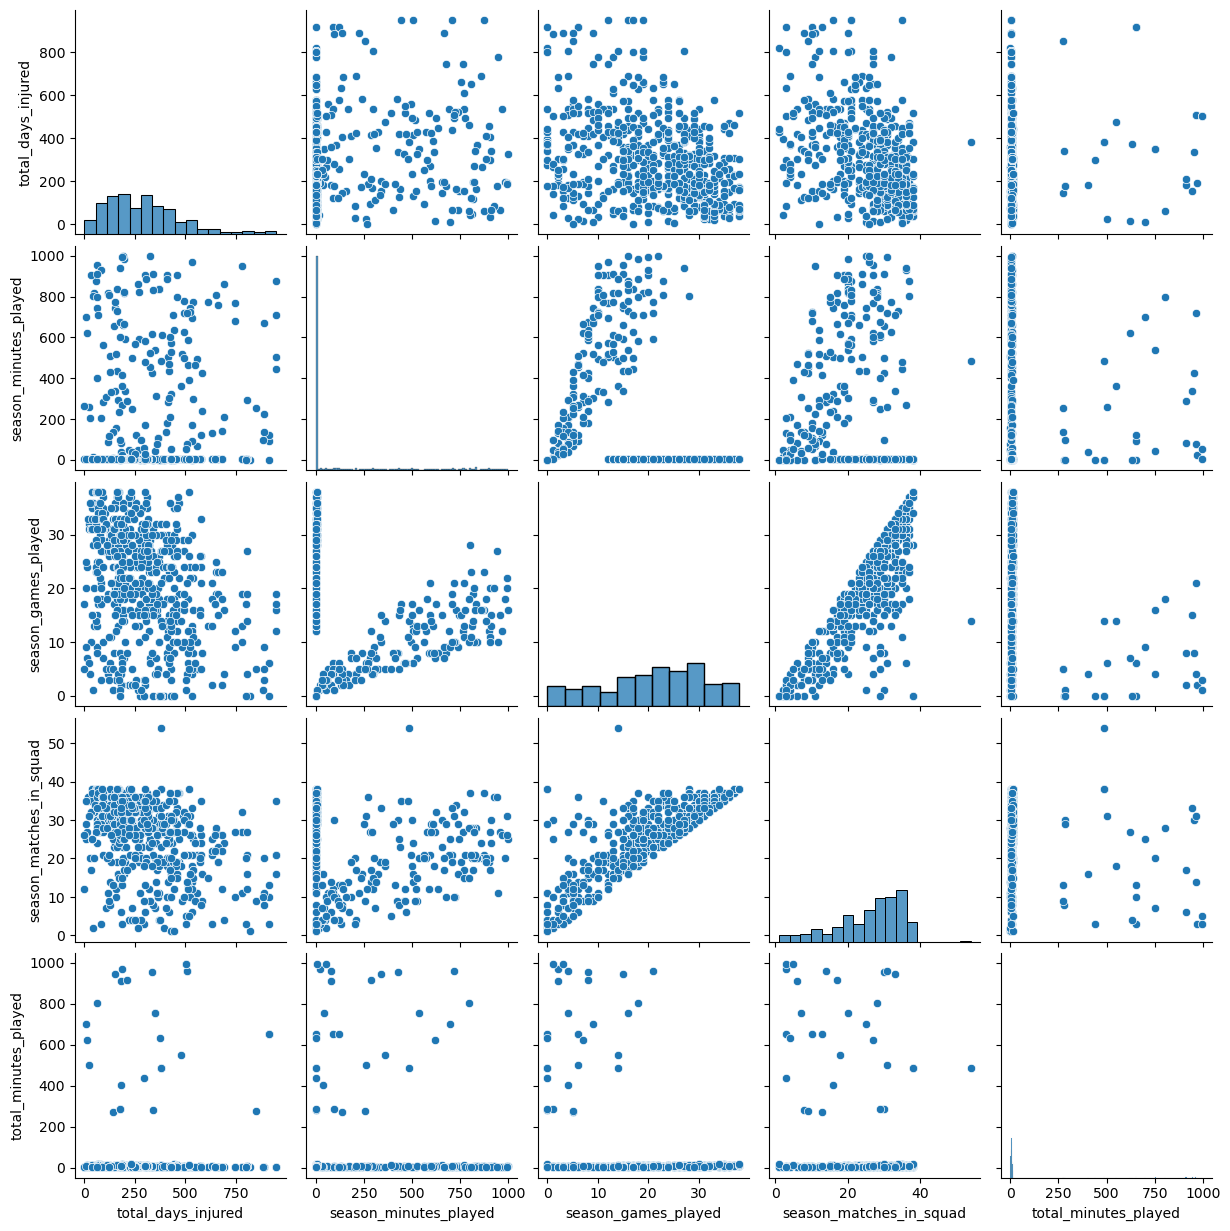

In [7]:
# Exposure/workload

sns.pairplot(data = injuries[["total_days_injured",
                              "season_minutes_played", 
                              "season_games_played",
                              "season_matches_in_squad",
                              "total_minutes_played"]],
            )

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


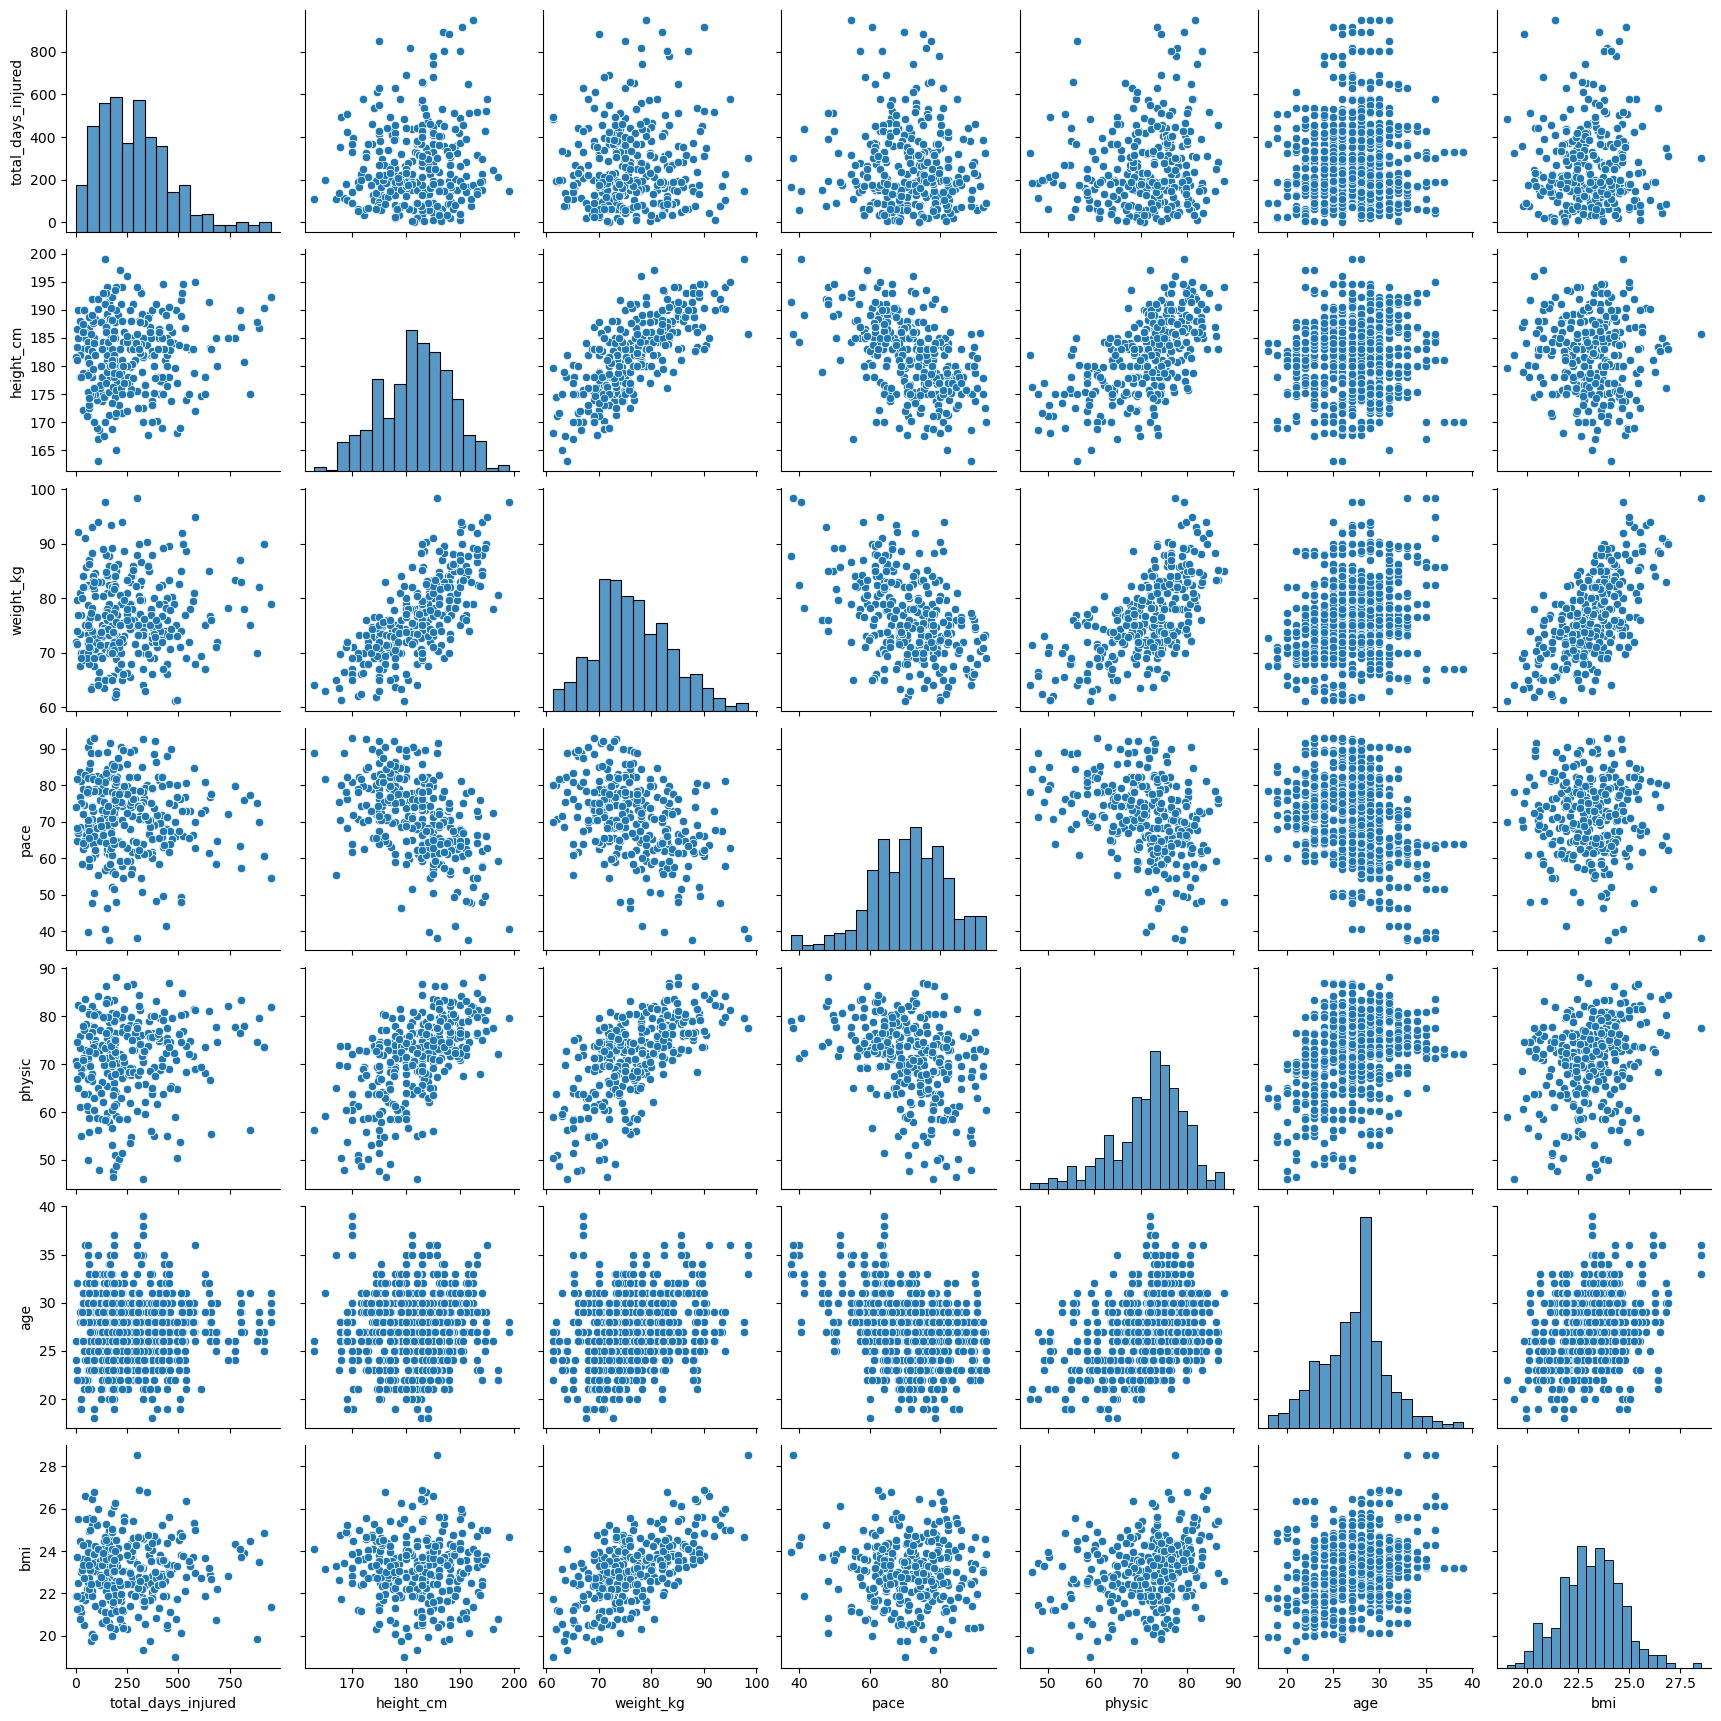

In [8]:
#Physical Profile
sns.pairplot(data = injuries[["total_days_injured",
                              "height_cm",
                              "weight_kg",
                              "pace",
                              "physic",
                              "age",
                              "bmi"]],
            )

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


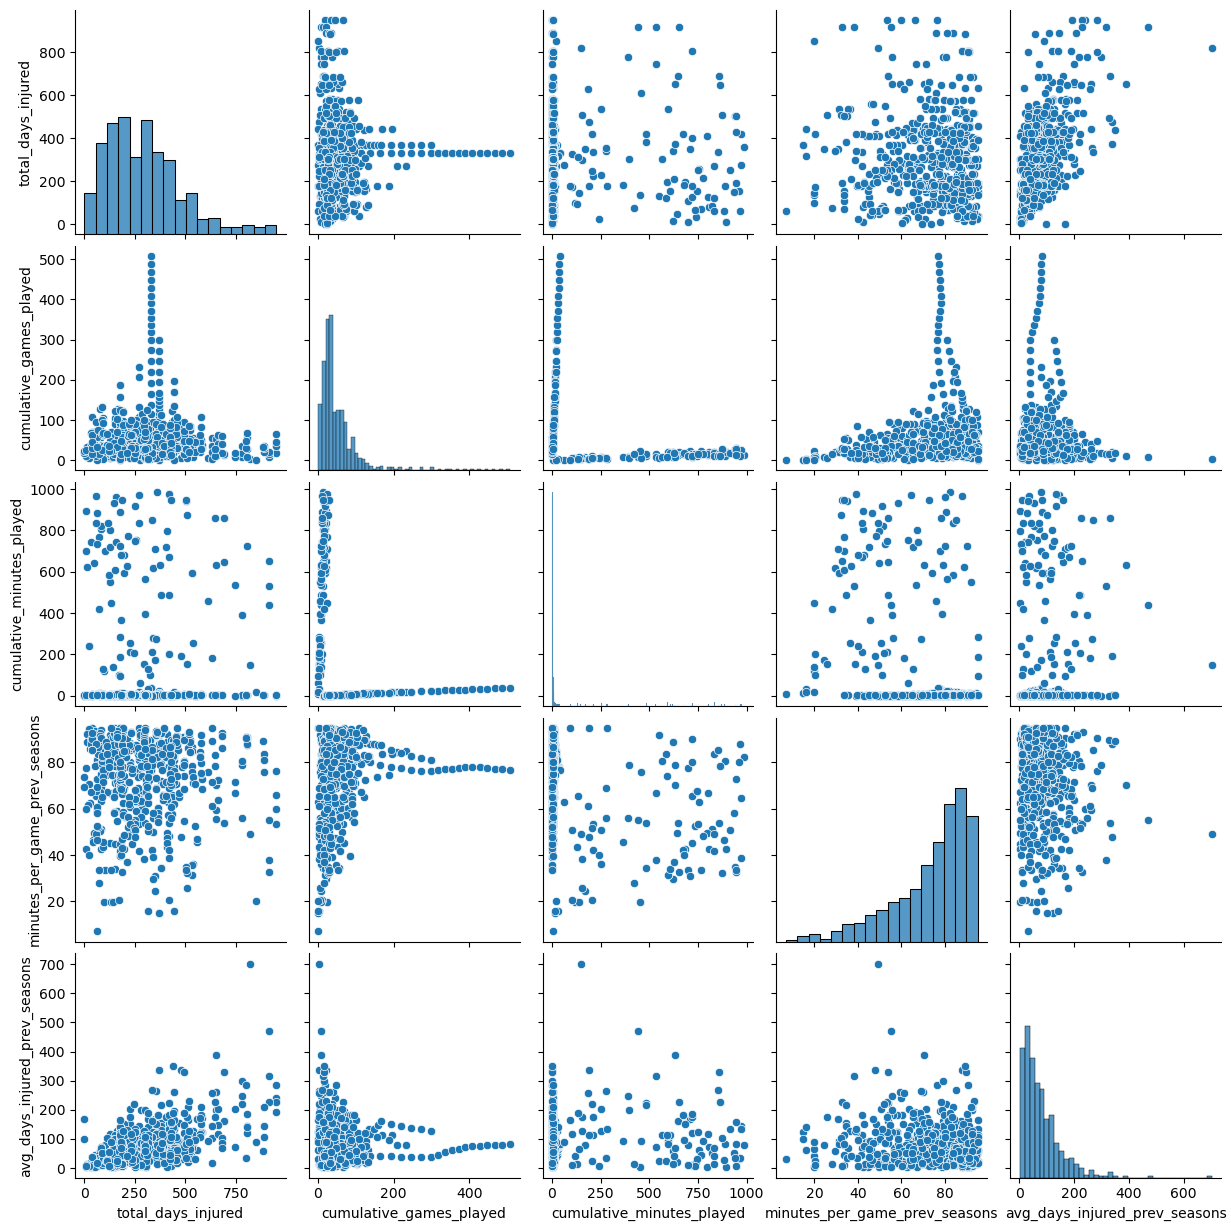

In [9]:
#Previous injury history/ workload
sns.pairplot(data = injuries[["total_days_injured",
                              "cumulative_games_played",
                              "cumulative_minutes_played",
                              "minutes_per_game_prev_seasons", 
                              "avg_days_injured_prev_seasons", 
                              "avg_games_per_season_prev_seasons"]])

<Axes: >

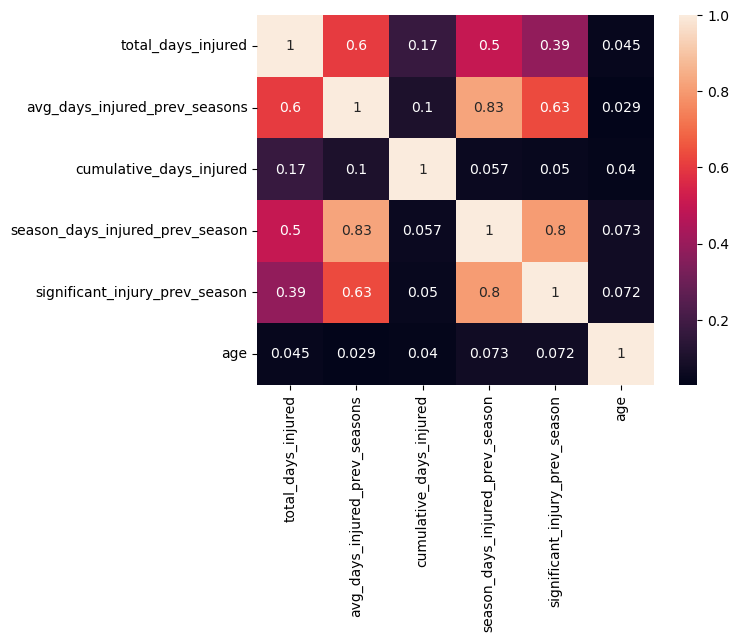

In [10]:
sns.heatmap(injuries[["total_days_injured",
                "avg_days_injured_prev_seasons",
                "cumulative_days_injured",
                "season_days_injured_prev_season",
                "significant_injury_prev_season",
                "age"]].corr(), annot=True)

<Axes: >

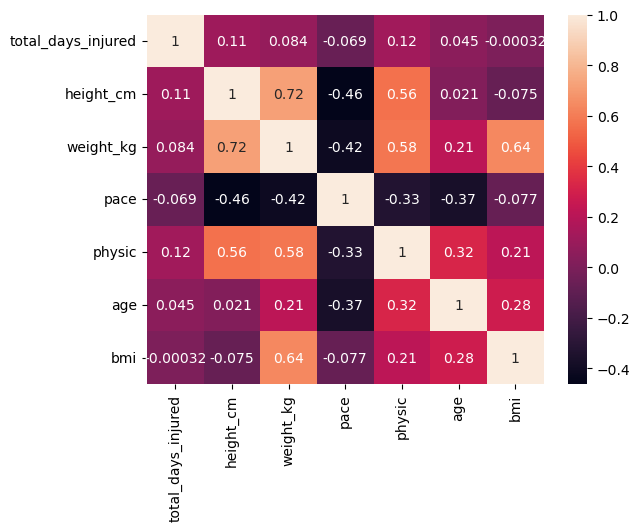

In [11]:
sns.heatmap(injuries[["total_days_injured",
                              "height_cm",
                              "weight_kg",
                              "pace",
                              "physic",
                              "age",
                              "bmi"]].corr(), annot=True)

**Observations and notes of data**

The data shows information for each individual injury, this means that as there are so many players it is hard to link the number of injuries to each player, so instead i will decide to investigate what factors will influence the severity of an injury (measured through the length of the injury) 

From this I will investigate how the physical profile of a player impacts the length of the history as I see some weak correlations and I want to investigate this further 

As a lot of the factors to do with a players exposure from the current season is dependent with the length of the injury for example if a player player has a big injury in a season they will not play many games that season meaning although high workload likely leads to injury this is not possible to interpret with the current data 


**My chosen question**

Does a players physical rating influence the severity of an injury?



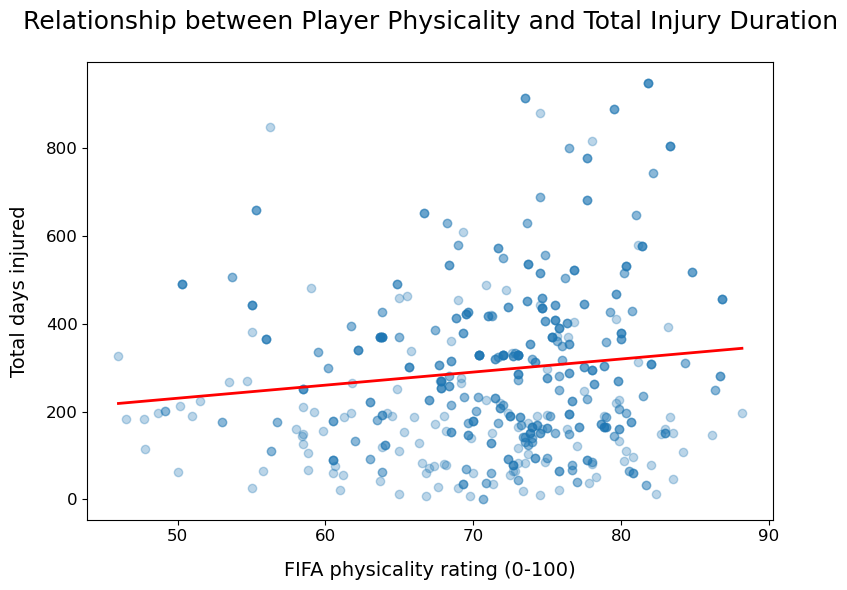

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(data=injuries,
          x = "physic",
          y = "total_days_injured",
          scatter_kws={'alpha':0.3},
          line_kws={'color':'red', 'linewidth':2},
          ci=None)

plt.ylabel("Total days injured", fontsize=14, labelpad=12)
plt.xlabel("FIFA physicality rating (0-100)", fontsize=14, labelpad=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Relationship between Player Physicality and Total Injury Duration", fontsize=18, pad = 24)
plt.tight_layout()
plt.savefig("physicality_vs_injury.pdf", bbox_inches="tight")
plt.show()


Calculate the correlation coefficient

In [13]:
r = injuries['physic'].corr(injuries['total_days_injured'])
print(f"Correlation coefficient: {r}")

Correlation coefficient: 0.12324731289164369
